In [1]:
#importing libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import plot_tree
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_auc_score
%load_ext autotime

time: 328 µs (started: 2022-05-12 18:43:10 +05:30)


In [2]:
#reading the data
train=pd.read_csv('train_file.csv')
test=pd.read_csv('test_file.csv')

time: 68.9 ms (started: 2022-05-12 18:43:11 +05:30)


In [3]:
#train data
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


time: 20.8 ms (started: 2022-05-12 17:25:54 +05:30)


In [4]:
#test data
test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


time: 18.7 ms (started: 2022-05-12 17:25:54 +05:30)


In [5]:
#shape of data
print("Train set shape: ",train.shape)
print("Test set shape: ",test.shape)

Train set shape:  (21000, 25)
Test set shape:  (9000, 24)
time: 2.05 ms (started: 2022-05-09 13:33:25 +05:30)


### test data has one less column than train data

In [6]:
#columns in train data
train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

time: 2.08 ms (started: 2022-05-09 12:09:25 +05:30)


In [7]:
#columns in test data
test.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

time: 6.42 ms (started: 2022-05-09 12:09:25 +05:30)


In [8]:
#checking for NULL values in the train set
train.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

time: 4.36 ms (started: 2022-05-09 12:09:26 +05:30)


In [9]:
#checking for duplicate values in train set
train.duplicated().sum()

0

time: 38 ms (started: 2022-05-09 12:09:27 +05:30)


In [10]:
#information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [11]:
#unique vAlues in train data
train.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

time: 25.1 ms (started: 2022-05-09 12:09:29 +05:30)


In [12]:
#setting ID as index 
#train.set_index('ID',inplace=True)
#test.set_index('ID',inplace=True)

time: 762 µs (started: 2022-05-06 16:43:25 +05:30)


In [12]:
#integer Categorical variables description
train[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,21000.000000,21000.000000,21000.000000
mean,1.607571,1.854190,1.551714
std,0.488303,0.791628,0.521176
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


time: 28.6 ms (started: 2022-05-09 12:09:32 +05:30)


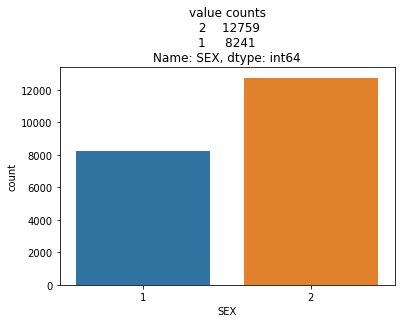

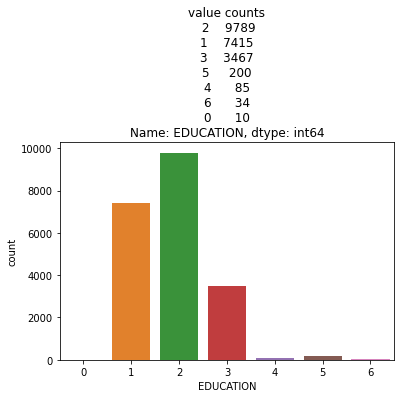

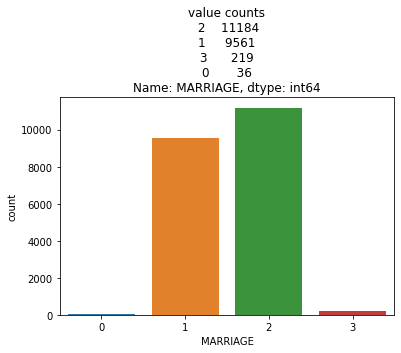

time: 587 ms (started: 2022-05-09 12:09:32 +05:30)


In [13]:
#categorical plots for categories
categories=['SEX', 'EDUCATION', 'MARRIAGE']
for cat in categories:
    train[cat]=train[cat].astype('category')
    sb.countplot(train[cat])
    plt.title("value counts\n {}".format(train[cat].value_counts()))
    plt.show()

### EDUCATION: category 5 and 6 are unknown, the category 0 is undocumented.
### MARRIAGE: label 0 is undocumented

In [14]:
# Payment delay description
train[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000
mean,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,-0.288667
std,1.12321,1.198957,1.198624,1.17221,1.141454,1.151592
min,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000
25%,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000
50%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
max,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000


time: 24.8 ms (started: 2022-05-09 12:09:35 +05:30)


### -2 is an undocumented label and -1,-2 can be seen as 0 meaning, payduly

In [15]:
# Bill Statement description
train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


time: 24.3 ms (started: 2022-05-09 12:09:37 +05:30)


### Negative values can not be bill amount

In [16]:
#Previous Payment Description
train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


time: 24.5 ms (started: 2022-05-09 12:09:39 +05:30)


In [17]:
#age description
train[['AGE']].describe()

,AGE
count,21000.000000
mean,35.461619
std,9.206628
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,75.000000


time: 24.6 ms (started: 2022-05-09 12:09:40 +05:30)


### Age group range 21-75 

Text(0.5, 1.0, 'std_dev = 9; kurtosis = 0;\n skew = 1;\n mean = 35; median = 34')

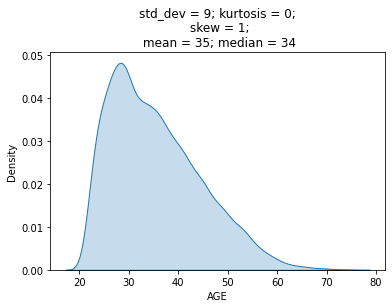

time: 188 ms (started: 2022-05-06 16:43:34 +05:30)


In [19]:
#density plot for age
sb.kdeplot(train['AGE'],fill=True)
plt.title('std_dev = {}; kurtosis = {};\n skew = {};\n mean = {}; median = {}'.format(round(train['AGE'].std()),round(train['LIMIT_BAL'].kurtosis()),round(train['AGE'].skew()),round(train['AGE'].mean()),round(train['AGE'].median())))

### Age is right skewed

In [18]:
#decription of limit balance
train[['LIMIT_BAL']].describe()

,LIMIT_BAL
count,21000.000000
mean,167214.746667
std,128965.188482
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,800000.000000


time: 8.66 ms (started: 2022-05-09 12:09:44 +05:30)


Text(0.5, 1.0, 'std_dev = 128965; kurtosis = 0;\n skew = 1;\n mean = 167215; median = 140000')

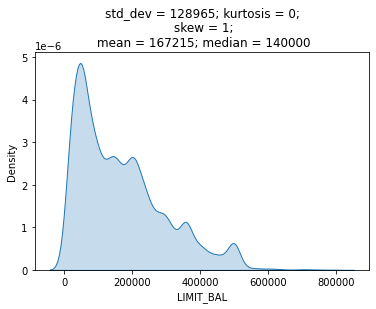

time: 479 ms (started: 2022-05-09 12:09:45 +05:30)


In [19]:
#limit balance density plot
sb.kdeplot(train['LIMIT_BAL'],fill=True)
plt.title('std_dev = {}; kurtosis = {};\n skew = {};\n mean = {}; median = {}'.format(round(train['LIMIT_BAL'].std()),round(train['LIMIT_BAL'].kurtosis()),round(train['LIMIT_BAL'].skew()),round(train['LIMIT_BAL'].mean()),round(train['LIMIT_BAL'].median())))

### Limit balance is right skewed

### Amount higher than 500000 fall into outliers

<AxesSubplot:>

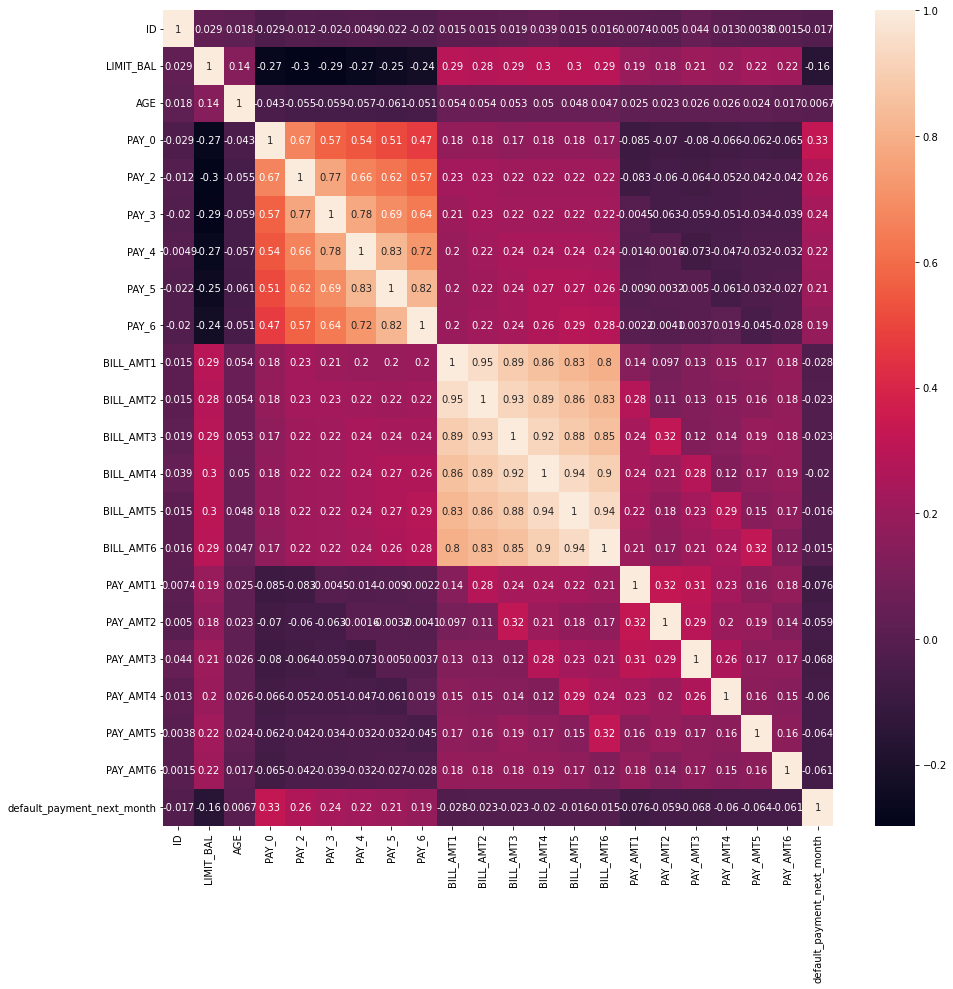

time: 1.57 s (started: 2022-05-09 12:09:48 +05:30)


In [20]:
#correlation matrix of 
plt.figure(figsize=(15,15))
sb.heatmap(train.corr(),annot=True)

In [21]:
#numerical data excluding categories
numerical=train.select_dtypes(include = ['int64','Int64'])

time: 2.49 ms (started: 2022-05-09 12:09:49 +05:30)


<AxesSubplot:>

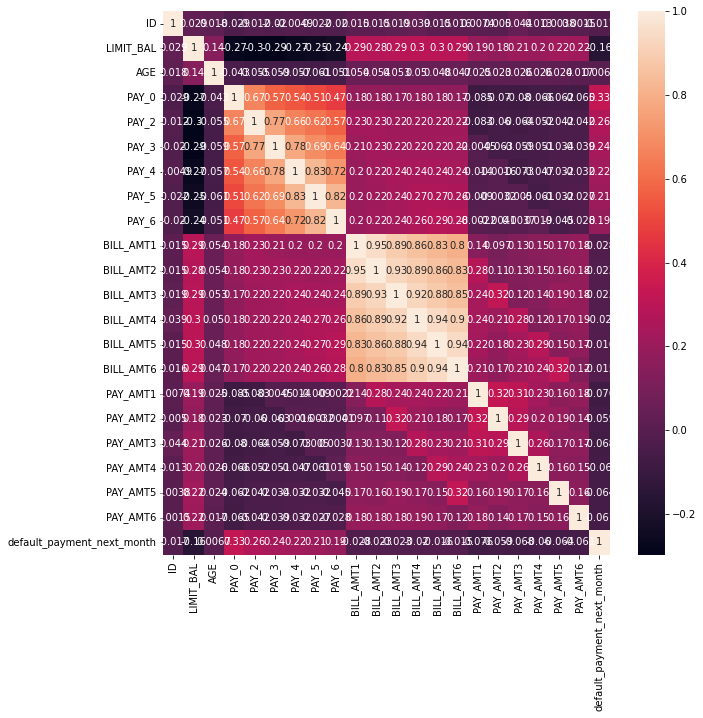

time: 1.62 s (started: 2022-05-09 12:09:49 +05:30)


In [22]:
#heatmap for numerical data excluding categories
plt.figure(figsize=(10,10))
sb.heatmap(numerical.corr(),annot=True)

### There is a high correlation within the features, payment status and bill amounts

Text(0.5, 1.0, 'count for each class\n  0    16355\n1     4645\nName: default_payment_next_month, dtype: int64')

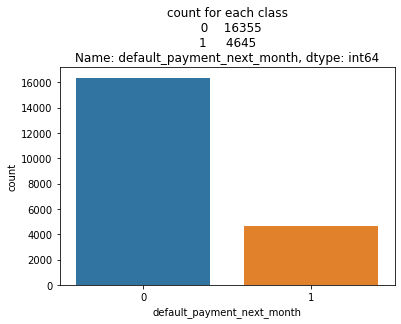

time: 91.1 ms (started: 2022-05-09 12:09:54 +05:30)


In [23]:
#categorical plot for defaulter 
sb.countplot(train.default_payment_next_month)
plt.title("count for each class\n  {}".format(train.default_payment_next_month.value_counts()))

### Data is fairly imbalanced

In [24]:
#grouping sex and defaulter category 
gender = train.groupby(['SEX', 'default_payment_next_month']).size().unstack(1)

time: 18.4 ms (started: 2022-05-09 12:09:56 +05:30)


In [25]:
#to calculate percentage of clients that will default
gender['perc_default'] = (gender[1]/(gender[0] + gender[1])) 

time: 1.84 ms (started: 2022-05-09 12:09:56 +05:30)


In [26]:
gender

default_payment_next_month,0,1,perc_default
SEX,,,
1,6258,1983,0.240626
2,10097,2662,0.208637


time: 6.73 ms (started: 2022-05-09 12:09:57 +05:30)


### 24% of males are likely to default next month

<AxesSubplot:xlabel='SEX'>

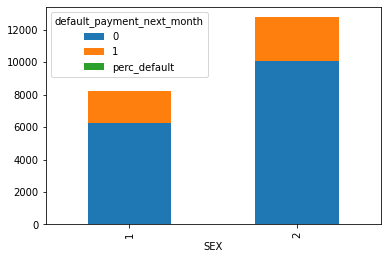

time: 292 ms (started: 2022-05-09 12:10:01 +05:30)


In [27]:
gender.plot(kind='bar', stacked = True)

### Majority of females(2) fall into the non defaulter category
### There are more female deafaulters than males

In [28]:
#function to generate histograms of continous variables
def generate_histograms(df, variables, n_rows, n_cols, n_bins):
    """
    params: df= dataframe to draw histograms, variables= columns, n_rows= no. of rows, n_cols= no. of cols,n_bins= no. of bins
    
    returns: generates histograms for the given data
       
    
    """
    fig=plt.figure(figsize=(12,8))
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sb.histplot(df[var],bins=n_bins,ax=ax,kde=True)
        ax.set_title("{}\n  min = {} ; max = {}\n mean={} ; std_dev={}".format(var,df[var].min(),df[var].max(),round(df[var].mean()),round(df[var].std())))
    fig.tight_layout()  
    plt.show()


time: 1.77 ms (started: 2022-05-09 12:10:02 +05:30)


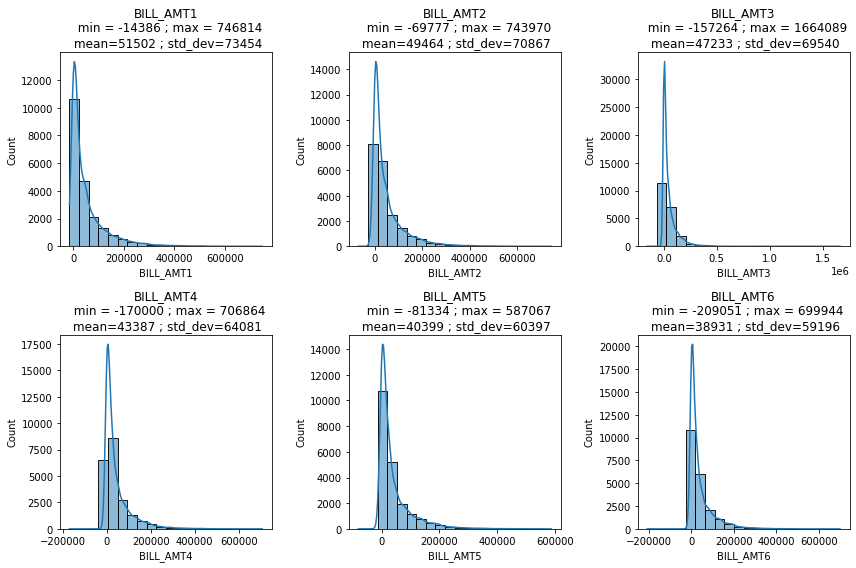

time: 1.31 s (started: 2022-05-09 12:10:03 +05:30)


In [29]:
#histograms of bill amounts to understand its distribution
bills = train[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
generate_histograms(bills, bills.columns, 2, 3, 20)

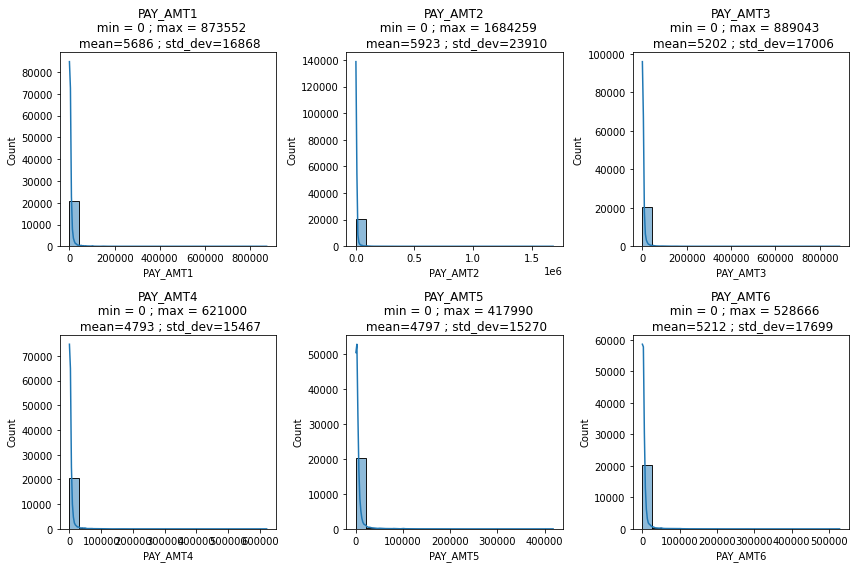

time: 1.26 s (started: 2022-05-09 12:10:04 +05:30)


In [30]:
#histograms of payment amounts to understand its distribution
pay = train[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
generate_histograms(pay, pay.columns, 2, 3, 20)


In [3]:
#function for data (test and train) cleaning 
def manage_categories(df):
    
    """
    params: dataframe to modify categories
    
    returns: dataframe with, categories 5,6,0 in education combined into 1 i.e 4=other
             category 0 in marriage considered as 3
             pay_0  renamed as pay_1
    
    """
    fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
    df.loc[fil, 'EDUCATION'] = 4
    print(df.EDUCATION.value_counts())
    df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
    print(df.MARRIAGE.value_counts()) 
    df = df.rename(columns={'PAY_0': 'PAY_1'})
        
    
    return df


time: 2.27 ms (started: 2022-05-12 18:43:24 +05:30)


In [4]:
#saving the modified data
train=manage_categories(train)
test=manage_categories(test)

2    9789
1    7415
3    3467
4     329
Name: EDUCATION, dtype: int64
2    11184
1     9561
3      255
Name: MARRIAGE, dtype: int64
2    4241
1    3170
3    1450
4     139
Name: EDUCATION, dtype: int64
2    4780
1    4098
3     122
Name: MARRIAGE, dtype: int64
time: 20 ms (started: 2022-05-12 15:14:33 +05:30)


In [33]:
#decscription of class 0 data, i.e non-defaulters
train.loc[train['default_payment_next_month']==0].describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,16355.000000,...,16355.000000,16355.000000,16355.000000,16355.000000,1.635500e+04,16355.000000,16355.000000,16355.000000,16355.000000,16355.0
mean,15026.017670,178153.592174,35.428921,-0.206237,-0.295628,-0.315561,-0.355671,-0.387955,-0.404647,52616.872944,...,44076.679976,40906.776276,39419.521553,6369.907368,6.679975e+03,5816.066769,5284.227270,5315.105717,5789.031122,0.0
std,8672.077428,130689.681944,9.083392,0.953273,1.038681,1.050352,1.013003,0.980968,1.004699,73733.689064,...,64408.561955,60571.971745,59633.327438,18424.477829,2.643916e+04,18542.993418,16688.050174,16413.993766,19070.076037,0.0
min,3.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,7527.500000,70000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3755.500000,...,2428.000000,1826.000000,1269.500000,1170.000000,1.017500e+03,607.000000,390.000000,360.000000,300.000000,0.0
50%,15029.000000,150000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23693.000000,...,19271.000000,18223.000000,16928.000000,2481.000000,2.268000e+03,2000.000000,1737.000000,1800.000000,1723.000000,0.0
75%,22582.500000,250000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70096.000000,...,57184.000000,51816.000000,50314.000000,5700.000000,5.356000e+03,5000.000000,4600.000000,4691.500000,4546.500000,0.0
max,29997.000000,800000.000000,75.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,746814.000000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,0.0


time: 94.5 ms (started: 2022-05-09 12:10:12 +05:30)


In [34]:
nondefaulter=train.loc[train['default_payment_next_month']==0]

time: 7.84 ms (started: 2022-05-09 12:10:13 +05:30)


<AxesSubplot:>

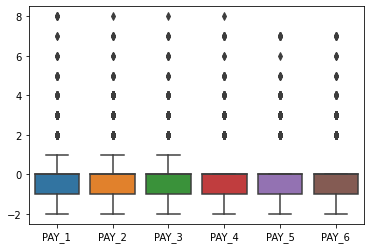

time: 138 ms (started: 2022-05-09 12:10:13 +05:30)


In [35]:
sb.boxplot(data=nondefaulter,order=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

### There are multiple outliers of the payment delay in the non defaulter data

In [36]:
#decscription of class 1 data, i.e defaulters
train.loc[train['default_payment_next_month']==1].describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,...,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.000000,4645.0
mean,14678.651884,128699.177610,35.576749,0.675565,0.465662,0.365770,0.265877,0.186222,0.119699,47574.474273,...,40960.327449,38609.095156,37211.797417,3279.548116,3257.713455,3041.347686,3064.171152,2972.813348,3179.088913,1.0
std,8488.332890,114689.050266,9.628118,1.377973,1.499768,1.499896,1.516109,1.498630,1.492549,72330.060952,...,62861.122239,59748.055779,57605.440752,9149.756335,10684.066771,9535.273054,9860.577126,10065.350519,11421.530807,0.0
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-6676.000000,...,-65167.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7451.000000,50000.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,2823.000000,...,1957.000000,1340.000000,1076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,14584.000000,90000.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19820.000000,...,18963.000000,18413.000000,17893.000000,1607.000000,1502.000000,1200.000000,1000.000000,1000.000000,1000.000000,1.0
75%,21524.000000,190000.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,58267.000000,...,49525.000000,47458.000000,46514.000000,3450.000000,3278.000000,3000.000000,2876.000000,3000.000000,2868.000000,1.0
max,29998.000000,740000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,344467.000000,221876.000000,292462.000000,330982.000000,250000.000000,1.0


time: 72.4 ms (started: 2022-05-09 12:10:15 +05:30)


In [37]:
defaulter=train.loc[train['default_payment_next_month']==1]

time: 7.01 ms (started: 2022-05-09 12:10:15 +05:30)


<AxesSubplot:>

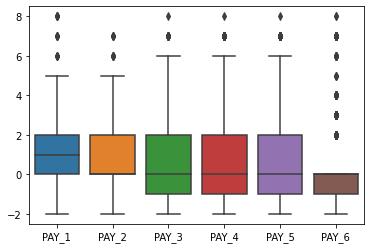

time: 143 ms (started: 2022-05-09 12:10:16 +05:30)


In [38]:
sb.boxplot(data=defaulter,order=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

### Defaulters have a longer delay period

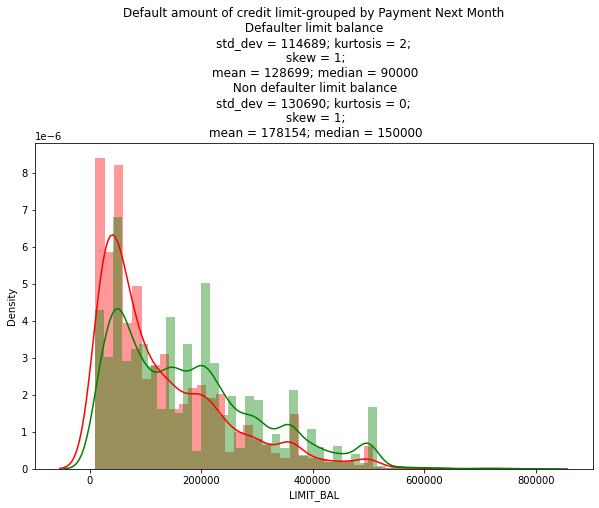

time: 312 ms (started: 2022-05-09 12:10:17 +05:30)


In [39]:
#Density Plot
plt.figure(figsize = (10,6))
plt.title('Default amount of credit limit-grouped by Payment Next Month')
sb.distplot(defaulter['LIMIT_BAL'],kde=True, color="red")
plt.title('Default amount of credit limit-grouped by Payment Next Month\n Defaulter limit balance \nstd_dev = {}; kurtosis = {};\n skew = {};\n mean = {}; median = {}\n Non defaulter limit balance\nstd_dev = {}; kurtosis = {};\n skew = {};\n mean = {}; median = {}'.format(round(defaulter['LIMIT_BAL'].std()),round(defaulter['LIMIT_BAL'].kurtosis()),round(defaulter['LIMIT_BAL'].skew()),round(defaulter['LIMIT_BAL'].mean()),round(defaulter['LIMIT_BAL'].median()),round(nondefaulter['LIMIT_BAL'].std()),round(nondefaulter['LIMIT_BAL'].kurtosis()),round(nondefaulter['LIMIT_BAL'].skew()),round(nondefaulter['LIMIT_BAL'].mean()),round(nondefaulter['LIMIT_BAL'].median())))
sb.distplot(nondefaulter['LIMIT_BAL'],kde=True, color="green")
plt.show()

### Most of defaulters have a credit limit in range 0 - 100,000

In [162]:
train['AGE'].describe()

count    21000.000000
mean        35.461619
std          9.206628
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

time: 13.7 ms (started: 2022-05-09 19:14:31 +05:30)


In [163]:
train[['default_payment_next_month']].loc[[i for i in train['AGE'] if i in range(21,28)]].value_counts()

default_payment_next_month
0                             4607
1                               45
dtype: int64

time: 22.6 ms (started: 2022-05-09 19:14:32 +05:30)


In [164]:
fil = [i for i in train['AGE'] if i in range(21,28)]
train.loc[fil, 'AGE'] = 1

time: 18.4 ms (started: 2022-05-09 19:14:33 +05:30)


In [165]:
train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


time: 25.1 ms (started: 2022-05-09 19:14:34 +05:30)


In [166]:
train[['default_payment_next_month']].loc[[i for i in train['AGE'] if i in range(28,34)]].value_counts()

default_payment_next_month
0                             3611
1                             1911
dtype: int64

time: 22.3 ms (started: 2022-05-09 19:14:39 +05:30)


In [167]:
train[['default_payment_next_month']].loc[[i for i in train['AGE'] if i in range(34,41)]].value_counts()

default_payment_next_month
0                             5052
dtype: int64

time: 24.5 ms (started: 2022-05-09 19:14:39 +05:30)


In [168]:
train[['default_payment_next_month']].loc[[i for i in train['AGE'] if i in range(41,75)]].value_counts()

default_payment_next_month
0                             5573
1                              193
dtype: int64

time: 23.2 ms (started: 2022-05-09 19:14:40 +05:30)


## Base Models

In [7]:
#dividing data into X and y
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

time: 2.26 ms (started: 2022-05-09 16:51:00 +05:30)


In [8]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True,random_state=0)

time: 6.04 ms (started: 2022-05-09 16:51:01 +05:30)


### Logistic Regression

In [9]:
#initializing logisticRegression model
logit=LogisticRegression(random_state=0,class_weight='balanced') #balancing the data using the 'balanced' mode of class_weight 
logit.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

time: 98.7 ms (started: 2022-05-09 16:51:03 +05:30)


In [10]:
ytest = np.array(y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, logit.predict(X_test)))
print(confusion_matrix(ytest, logit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68      4101
           1       0.29      0.62      0.40      1149

    accuracy                           0.58      5250
   macro avg       0.57      0.60      0.54      5250
weighted avg       0.72      0.58      0.62      5250

[[2349 1752]
 [ 434  715]]
time: 17.9 ms (started: 2022-05-09 16:51:03 +05:30)


#### before balancing, the accuracy of the base model: print("Accuracy of LR model",accuracy_score(ytest, logit.predict(X_test)))
### Accuracy of LR model 0.7813333333333333

In [48]:
#after balancing the data, accuracy of LR model reduces 
print("Accuracy of LR model",accuracy_score(ytest, logit.predict(X_test)))


Accuracy of LR model 0.5836190476190476
time: 6.31 ms (started: 2022-05-06 16:46:15 +05:30)


### SVM using rbf kernel

In [165]:
#initialzing SVM model using rbf kernel
svm=SVC(random_state=0,class_weight='balanced')

time: 332 µs (started: 2022-05-09 13:20:57 +05:30)


In [166]:
#fitting the svm model
svm.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=0)

time: 11.9 s (started: 2022-05-09 13:20:57 +05:30)


In [167]:
ytest = np.array(y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, svm.predict(X_test)))
print(confusion_matrix(ytest, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      4101
           1       0.29      0.69      0.41      1149

    accuracy                           0.57      5250
   macro avg       0.58      0.61      0.54      5250
weighted avg       0.74      0.57      0.61      5250

[[2199 1902]
 [ 354  795]]
time: 7.14 s (started: 2022-05-09 13:21:10 +05:30)


In [52]:
#after balancing the data, accuracy of LR model reduces 
print("Accuracy of svm model",accuracy_score(ytest, svm.predict(X_test)))


Accuracy of svm model 0.5702857142857143
time: 3.9 s (started: 2022-05-06 16:46:42 +05:30)


### Balancing the data using class_weight method

In [53]:
#Imbalanced dataset
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 12254, 1: 3496})
Testing target statistics: Counter({0: 4101, 1: 1149})
time: 3.64 ms (started: 2022-05-06 16:47:04 +05:30)


### Decision tree

In [54]:
#initialzing Decision tree model
dt= DecisionTreeClassifier(random_state=0,class_weight='balanced')

time: 1.09 ms (started: 2022-05-06 16:47:18 +05:30)


In [55]:
#fitting DT model
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

time: 292 ms (started: 2022-05-06 16:47:19 +05:30)


In [56]:
ytest = np.array(y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, dt.predict(X_test)))
print(confusion_matrix(ytest, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4101
           1       0.37      0.38      0.37      1149

    accuracy                           0.72      5250
   macro avg       0.60      0.60      0.60      5250
weighted avg       0.73      0.72      0.72      5250

[[3358  743]
 [ 713  436]]
time: 17.1 ms (started: 2022-05-06 16:47:20 +05:30)


#before balancing, the accuracy of the base model: 
print("Accuracy of DT model",accuracy_score(ytest, dt.predict(X_test)))

Accuracy of DT model 0.7287619047619047

### Feature engineering 

### Generating a new single feature from the mean of interdependent columns (REpayment status, bill payment amounts, previous payment amount )

In [4]:
def modify(df):
    df['pay_avg']=df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
    df['BILL_AVG']=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
    df['pay_amt_AVG']=df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
#     df.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',],axis=1,inplace=True)
#     df.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)
    return df

time: 803 µs (started: 2022-05-12 18:43:33 +05:30)


In [5]:
modify(test)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,pay_avg,BILL_AVG,pay_amt_AVG
0,10178,60000,2,2,1,30,0,0,0,0,...,39544,1628,1618,1375,1403,1520,1205,0.000000,38068.500000,1458.166667
1,5304,200000,2,1,2,29,0,0,0,0,...,10510,4160,14593,20150,0,5739,12050,0.333333,59440.333333,9448.666667
2,5187,230000,1,1,2,39,0,0,0,0,...,0,2500,2000,0,0,0,0,-0.666667,16498.000000,750.000000
3,14495,150000,1,1,2,40,0,0,0,0,...,146872,5800,5245,5200,5200,6500,7200,0.000000,146072.166667,5857.500000
4,20444,140000,1,2,2,27,0,0,0,0,...,81848,10000,10000,3393,3260,5000,3000,0.000000,77156.833333,5775.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,...,0,0,0,0,0,0,0,-1.666667,535.000000,0.000000
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,...,5990,1950,7956,499,0,5990,0,-1.000000,3195.833333,2732.500000
8997,24002,60000,1,2,2,26,0,0,0,0,...,28847,2282,2324,2049,2000,3000,1120,0.000000,47678.166667,2129.166667
8998,17019,70000,2,2,2,23,0,0,0,0,...,45849,2100,2079,2500,2000,2000,1700,0.000000,46587.500000,2063.166667


time: 26.4 ms (started: 2022-05-12 18:43:33 +05:30)


In [6]:
modify(train)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,pay_avg,BILL_AVG,pay_amt_AVG
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,12590,3479,3446,8870,2020,27043,0,-1.000000,8557.666667,9574.666667
1,13470,240000,2,1,2,46,2,2,-2,-1,...,0,0,2240,0,2267,3074,0,0.000000,1107.333333,1263.500000
2,3092,320000,2,2,1,41,0,0,0,0,...,5000,2000,2000,3000,3000,1500,0,0.000000,41459.666667,2750.000000
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,1,-1.666667,445.833333,0.000000
4,10567,80000,1,3,1,52,-1,0,0,0,...,1500,1500,1500,1028,876,1449,0,-0.166667,22841.000000,1308.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,-1.500000,0.000000,0.000000
20996,25589,80000,2,2,1,37,0,0,0,0,...,5000,3000,2000,4000,2000,2000,0,0.000000,55198.500000,3000.000000
20997,4378,100000,1,1,1,52,1,2,2,2,...,0,3600,0,6000,3000,0,1,1.166667,25024.000000,2100.000000
20998,8604,90000,2,2,1,47,0,0,0,0,...,2000,2000,2000,2000,2000,2000,0,0.000000,28903.000000,2000.000000


time: 35.5 ms (started: 2022-05-12 18:43:34 +05:30)


In [7]:
def frequency_encoding(data,cat):
    
    """
    data: training data
    cat: categorical feature on which we have to apply frequency encoding techniques
 
    returns a feature will all categoris assigned to its frequency
    
    """

    
    
    freq_enc = data.groupby(cat).size()/len(data)
    return  data[cat].map(freq_enc)
 

time: 1.54 ms (started: 2022-05-12 18:43:36 +05:30)


In [8]:
#Applying frequency encoding to marriage feature
train['MARRIAGE'] = frequency_encoding(train,'MARRIAGE')


time: 11.2 ms (started: 2022-05-12 18:43:36 +05:30)


In [9]:
test['MARRIAGE'] = frequency_encoding(test,'MARRIAGE')

time: 7.69 ms (started: 2022-05-12 18:43:37 +05:30)


In [10]:
le = LabelEncoder()
train['EDUCATION'] = le.fit_transform(train['EDUCATION'])

time: 5.41 ms (started: 2022-05-12 18:43:37 +05:30)


In [11]:
test['EDUCATION'] = le.fit_transform(test['EDUCATION'])

time: 3.38 ms (started: 2022-05-12 18:43:38 +05:30)


In [12]:
enc = OneHotEncoder(handle_unknown='ignore')
train['SEX']=enc.fit_transform(train[['SEX']]).toarray()

time: 14.5 ms (started: 2022-05-12 18:43:38 +05:30)


In [13]:
test['SEX']=enc.fit_transform(test[['SEX']]).toarray()

time: 10.1 ms (started: 2022-05-12 18:43:38 +05:30)


<AxesSubplot:>

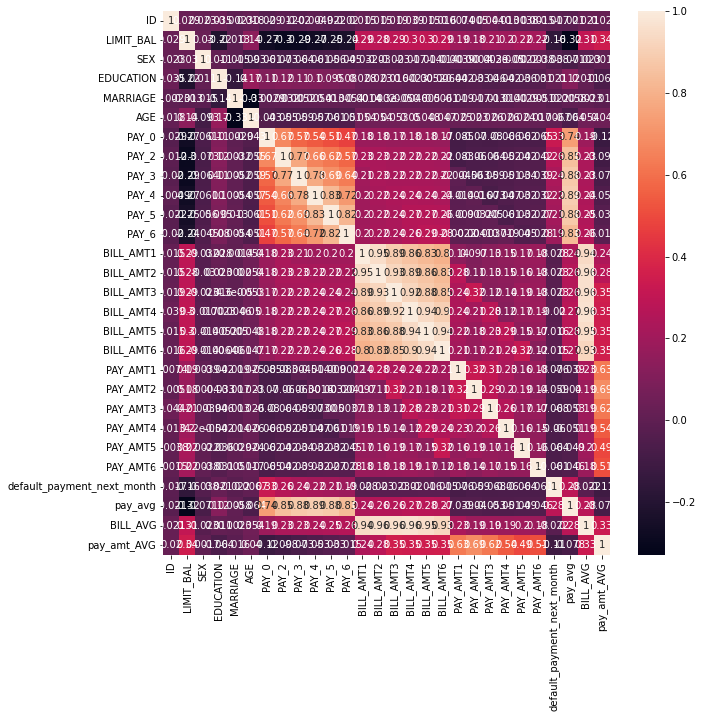

time: 2.31 s (started: 2022-05-09 17:33:08 +05:30)


In [67]:
num=train.corr()
#heatmap for numerical data excluding categories
plt.figure(figsize=(10,10))
sb.heatmap(num,annot=True)

## Modeling using modified dataframe with new features and standardizing features

In [49]:
# #initializing standard scaler object
# sc=StandardScaler()

time: 712 µs (started: 2022-05-12 16:08:04 +05:30)


In [15]:
Y=train['default_payment_next_month']
train.drop('default_payment_next_month',axis=1,inplace=True)
x=train

time: 12 ms (started: 2022-05-12 18:44:11 +05:30)


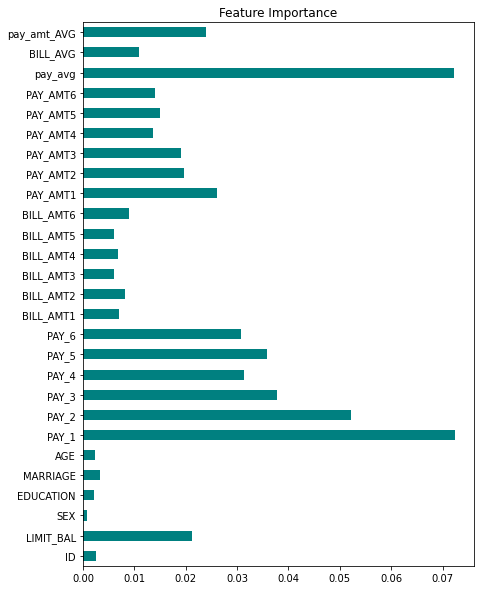

time: 2.26 s (started: 2022-05-12 15:00:12 +05:30)


In [37]:
#checking importance of each feature wrt target variable
importance=mutual_info_classif(x,Y)
feat_imp=pd.Series(importance,train.columns[0:len(train.columns)])
plt.figure(figsize=(7,10))
plt.title('Feature Importance')
feat_imp.plot(kind='barh',color='teal')
plt.show()

In [16]:
x.drop(['ID'],axis=1,inplace=True)

time: 8.73 ms (started: 2022-05-12 18:44:13 +05:30)


In [104]:
x=sc.fit_transform(x)

time: 18.8 ms (started: 2022-05-12 15:12:19 +05:30)


In [17]:
#applying smote for class balancing
sm = SMOTE(random_state=42)
x_res, Y_res= sm.fit_resample(x, Y)

time: 412 ms (started: 2022-05-12 18:44:16 +05:30)


In [18]:
#splitting the data into train and test set
x_train,x_test,Y_train,Y_test=train_test_split(x_res, Y_res,test_size=0.25,shuffle=True,random_state=42)

time: 15.8 ms (started: 2022-05-12 18:44:17 +05:30)


### Logistic Regression

In [24]:
#initializing logisticRegression model
lr=LogisticRegression(random_state=0) #balancing the data using the 'balanced' mode of class_weight 
lr.fit(x_train,Y_train)

LogisticRegression(random_state=0)

time: 114 ms (started: 2022-05-09 16:52:19 +05:30)


In [25]:
Ytest = np.array(Y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(Ytest, lr.predict(x_test)))
print(confusion_matrix(Ytest, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4112
           1       0.67      0.67      0.67      4066

    accuracy                           0.67      8178
   macro avg       0.67      0.67      0.67      8178
weighted avg       0.67      0.67      0.67      8178

[[2740 1372]
 [1339 2727]]
time: 33.2 ms (started: 2022-05-09 16:52:20 +05:30)


### SVM with rbf kernel

In [23]:
#initialzing SVM model using rbf kernel
sv=SVC(random_state=0)

time: 330 µs (started: 2022-05-09 18:04:41 +05:30)


In [24]:
#fitting the svm model
sv.fit(x_train,
       Y_train)

SVC(random_state=0)

time: 26.9 s (started: 2022-05-09 18:04:42 +05:30)


In [25]:
Ytest = np.array(Y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(Ytest, sv.predict(x_test)))
print(confusion_matrix(Ytest, sv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      4112
           1       0.77      0.61      0.68      4066

    accuracy                           0.72      8178
   macro avg       0.72      0.71      0.71      8178
weighted avg       0.72      0.72      0.71      8178

[[3366  746]
 [1584 2482]]
time: 14.6 s (started: 2022-05-09 18:05:08 +05:30)


### Decision tree

In [119]:
#initialzing Decision tree model
dtree= DecisionTreeClassifier(random_state=42,min_samples_split= 5, min_samples_leaf= 15, max_features=0.9, max_depth= 9, criterion='entropy') 

time: 833 µs (started: 2022-05-12 15:46:41 +05:30)


In [120]:
#fitting DT model
dtree.fit(x_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=0.9,
                       min_samples_leaf=15, min_samples_split=5,
                       random_state=42)

time: 349 ms (started: 2022-05-12 15:46:42 +05:30)


In [121]:
Ytest = np.array(Y_test)

#confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(Ytest, dtree.predict(x_test)))
print(confusion_matrix(Ytest, dtree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4110
           1       0.87      0.78      0.82      4068

    accuracy                           0.83      8178
   macro avg       0.83      0.83      0.83      8178
weighted avg       0.83      0.83      0.83      8178

[[3635  475]
 [ 908 3160]]
time: 28.7 ms (started: 2022-05-12 15:46:43 +05:30)


In [122]:
print("f1 score of DT",f1_score(Ytest, dtree.predict(x_test)))

f1 score of DT 0.8204595612099183
time: 12.8 ms (started: 2022-05-12 15:46:45 +05:30)


In [123]:
#area under the ROC curve
print(roc_auc_score(Ytest, dtree.predict(x_test)))

0.8306113587264674
time: 11.3 ms (started: 2022-05-12 15:46:45 +05:30)


<AxesSubplot:title={'center':'Confusion Matrix (with SMOTE)'}>

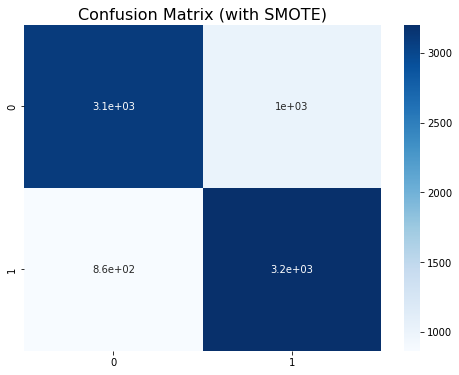

time: 142 ms (started: 2022-05-09 19:17:23 +05:30)


In [21]:
#confusion matrix
cm=confusion_matrix(Ytest, dtree.predict(x_test))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sb.heatmap(cm, annot=True, cmap='Blues')

In [70]:
cr=classification_report(Ytest, dtree.predict(x_test),output_dict=True)
cr_df=pd.DataFrame(cr)

time: 31.2 ms (started: 2022-05-09 18:11:44 +05:30)


In [80]:
cr_df.T

,precision,recall,f1-score,support
0,0.780297,0.753161,0.766489,4112.000000
1,0.758850,0.785539,0.771964,4066.000000
accuracy,0.769259,0.769259,0.769259,0.769259
macro avg,0.769574,0.769350,0.769227,8178.000000
weighted avg,0.769634,0.769259,0.769211,8178.000000


time: 18.1 ms (started: 2022-05-09 17:33:49 +05:30)


### KNN

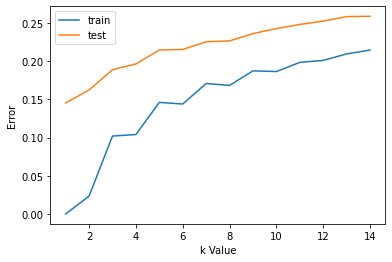

time: 1min 39s (started: 2022-05-09 12:26:12 +05:30)


In [78]:
#comparing bias and variance error to find optimal value for K
error1= []
error2= []

for k in range(1,15): 
   
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,Y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(Y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(Y_test!= y_pred2))

plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

### From the graph, optimal value for k is 11, keeping in mind the bias variance tradeoff

In [25]:
#initializing knn model with k=11
knn= KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn.fit(x_train,Y_train)
#y_pred= knn.predict(x_test)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

time: 5.03 ms (started: 2022-05-11 10:50:50 +05:30)


In [26]:
Ytest = np.array(Y_test)

#Classification report and confusion matrix
print(classification_report(Ytest, knn.predict(x_test)))
print(confusion_matrix(Ytest, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.70      0.75      4112
           1       0.73      0.85      0.79      4066

    accuracy                           0.77      8178
   macro avg       0.78      0.77      0.77      8178
weighted avg       0.78      0.77      0.77      8178

[[2858 1254]
 [ 606 3460]]
time: 10.3 s (started: 2022-05-11 10:50:51 +05:30)


<AxesSubplot:title={'center':'Confusion Matrix (with SMOTE)'}>

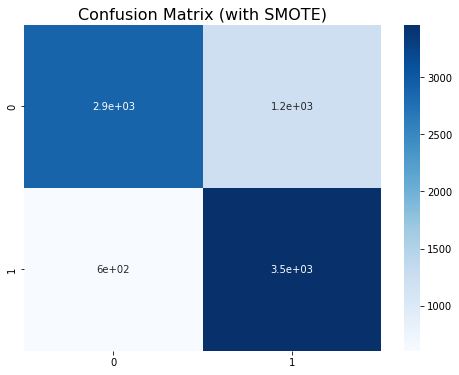

time: 5.73 s (started: 2022-05-09 17:34:13 +05:30)


In [83]:
#confusion matrix
mat=confusion_matrix(Ytest, knn.predict(x_test))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sb.heatmap(mat, annot=True, cmap='Blues')

In [27]:
#f1 score 
print("f1 score of knn",f1_score(Ytest, knn.predict(x_test)))

f1 score of knn 0.7881548974943051
time: 4.96 s (started: 2022-05-11 10:51:01 +05:30)


In [28]:
#area under the ROC curve
print(roc_auc_score(Ytest, knn.predict(x_test)))

0.7729990420704294
time: 4.93 s (started: 2022-05-11 10:51:09 +05:30)


## Random Forest Classifier

In [59]:
rf=RandomForestClassifier(random_state=42,min_samples_split= 3, min_samples_leaf=7 , max_features=0.7, criterion='gini')

time: 627 µs (started: 2022-05-12 16:10:07 +05:30)


In [60]:
rf.fit(x_train,Y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=7,
                       min_samples_split=3, random_state=42)

time: 17 s (started: 2022-05-12 16:10:08 +05:30)


In [61]:
Ytest = np.array(Y_test)

#Classification report and confusion matrix
print(classification_report(Ytest, rf.predict(x_test)))
print(confusion_matrix(Ytest, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4110
           1       0.90      0.83      0.86      4068

    accuracy                           0.87      8178
   macro avg       0.87      0.87      0.87      8178
weighted avg       0.87      0.87      0.87      8178

[[3741  369]
 [ 707 3361]]
time: 268 ms (started: 2022-05-12 16:10:28 +05:30)


In [62]:
#area under the ROC curve
print(roc_auc_score(Ytest, rf.predict(x_test)))

0.8682117506046838
time: 144 ms (started: 2022-05-12 16:10:30 +05:30)


## Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

time: 436 µs (started: 2022-05-12 16:22:13 +05:30)


In [64]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(x_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, random_state=100)

time: 2.38 s (started: 2022-05-12 16:22:18 +05:30)


In [65]:
Ytest = np.array(Y_test)

#Classification report and confusion matrix
print(classification_report(Ytest, gbc.predict(x_test)))
print(confusion_matrix(Ytest, gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      4110
           1       0.85      0.79      0.82      4068

    accuracy                           0.83      8178
   macro avg       0.83      0.83      0.83      8178
weighted avg       0.83      0.83      0.83      8178

[[3555  555]
 [ 847 3221]]
time: 60.8 ms (started: 2022-05-12 16:22:23 +05:30)


In [66]:
#area under the ROC curve
print(roc_auc_score(Ytest, gbc.predict(x_test)))

0.8283765404187212
time: 33.3 ms (started: 2022-05-12 16:22:24 +05:30)


## XGBoost 

In [11]:
#pip install xgboost

time: 838 µs (started: 2022-05-12 14:53:17 +05:30)


In [19]:
xgb_cl = xgb.XGBClassifier(random_state=42,eval_metric='auc',min_child_weight=6,learning_rate=0.1,gamma= 0, subsample=0.8, colsample_bytree=0.8,reg_alpha= 57.0,n_estimators=1000,nthread=4, reg_lambda= 0.896332305739873,objective= 'binary:logistic')

time: 981 µs (started: 2022-05-12 18:44:51 +05:30)


In [20]:
xgb_cl.fit(x_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=57.0, ...)

time: 11.8 s (started: 2022-05-12 18:44:52 +05:30)


In [21]:
Ytest = np.array(Y_test)

#Classification report and confusion matrix
print(classification_report(Ytest, xgb_cl.predict(x_test)))
print(confusion_matrix(Ytest, xgb_cl.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      4110
           1       0.90      0.80      0.85      4068

    accuracy                           0.86      8178
   macro avg       0.86      0.86      0.86      8178
weighted avg       0.86      0.86      0.86      8178

[[3751  359]
 [ 807 3261]]
time: 177 ms (started: 2022-05-12 18:52:57 +05:30)


In [31]:
#area under the ROC curve
print(roc_auc_score(Ytest, xgb_cl.predict_proba(x_test)[:, 1]))

0.9254321904748235
time: 75.1 ms (started: 2022-05-12 19:00:01 +05:30)


## Hyper Parameter tuning using RandomizedSearchCV

In [107]:
#defining a dictionary of parameters for DT model
parameters ={'max_depth': [9,10,11,12,13,14],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10]}

time: 1.11 ms (started: 2022-05-12 15:42:50 +05:30)


In [108]:
#Hyperparameter tuning using randomized search

random_search=RandomizedSearchCV(estimator = DecisionTreeClassifier(),cv=5, param_distributions=parameters, n_jobs=-1,
                            n_iter=200,scoring="roc_auc")
random_result = random_search.fit(x_train, Y_train)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Best Score:  89.1815339373666
Best Params:  {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 0.7, 'max_depth': 10, 'criterion': 'entropy'}
time: 55.6 s (started: 2022-05-12 15:42:51 +05:30)


In [122]:
# HP tuning for KNN model
n_neighbors = range(1, 15)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

estimator = RandomizedSearchCV(knn, grid, cv=5, scoring="f1", verbose=1, n_jobs=-1,
                            n_iter=200)
rs=estimator.fit(x_train, Y_train)
print('Best Score: ', rs.best_score_*100)
print('Best Params: ', rs.best_params_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Score:  83.49049111395604
Best Params:  {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}
time: 5min 14s (started: 2022-05-09 15:18:55 +05:30)


In [22]:
# # HP tuning for RF model
# # 'max_depth': [60, 70, 80, 90, 100],
# parameters ={
#      'criterion' : ['gini', 'entropy'],
#      'max_features': [0.3,0.5,0.7,0.9],
#      'min_samples_leaf': [3,5,7,10,15],
#      'min_samples_split': [2,5,10],
#      'n_estimators': [50,100,200,400,600]}

# random_search=RandomizedSearchCV(estimator = RandomForestClassifier(),scoring='roc_auc' ,param_distributions=parameters,cv=5, n_jobs=-1,
#                             n_iter=200)
# random_result = random_search.fit(x_train, Y_train)
# print('Best Score: ', random_result.best_score_*100)
# print('Best Params: ', random_result.best_params_)

time: 1.05 ms (started: 2022-05-12 16:02:21 +05:30)


In [39]:
# param={"max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],"scale_pos_weight": [1, 3, 5]}

# random_search=RandomizedSearchCV(estimator = xgb_cl,cv=5, param_distributions=param, n_jobs=-1,
#                             n_iter=200,scoring="roc_auc")
# random_result = random_search.fit(x_train, Y_train)
# print('Best Score: ', random_result.best_score_*100)
# print('Best Params: ', random_result.best_params_)

time: 915 µs (started: 2022-05-12 19:12:12 +05:30)


## Predicting defaulter category (yes=1,no=0) on TEST data using XGBoost

In [33]:
#creating a new dataframe including only customer ID and defaulter category
submission_Diya=pd.DataFrame()

time: 1.88 ms (started: 2022-05-12 19:00:36 +05:30)


In [34]:
#adding the ID column from test data
submission_Diya['ID']=test['ID']

time: 6.54 ms (started: 2022-05-12 19:00:37 +05:30)


In [28]:
#Applying frequency encoding to marriage feature
# test['MARRIAGE'] = frequency_encoding(test,'MARRIAGE')


#le = LabelEncoder()
#test['EDUCATION'] = le.fit_transform(test['EDUCATION'])


time: 2.69 ms (started: 2022-05-09 19:18:14 +05:30)


In [60]:
#test['SEX']=enc.fit_transform(test[['SEX']]).toarray()


time: 15.9 ms (started: 2022-05-09 19:21:59 +05:30)


In [35]:
#dropping less important columns from test data to match number of features 
#st.drop(['MARRIAGE','AGE','ID'],axis=1,inplace=True)
test.drop(['ID'], axis=1,inplace=True)

time: 4.99 ms (started: 2022-05-12 19:00:39 +05:30)


In [113]:
#standardizing test data
test=sc.fit_transform(test)

time: 6.38 ms (started: 2022-05-12 15:12:46 +05:30)


In [36]:
#predicting the defaulter class
submission_Diya['default_payment_next_month']=xgb_cl.predict_proba(test)[:, 1]

time: 70.2 ms (started: 2022-05-12 19:00:40 +05:30)


In [37]:
#saving dataframe into csv
submission_Diya.to_csv('Submission_Diya.csv',index=False)

time: 26.2 ms (started: 2022-05-12 19:00:41 +05:30)


In [1]:
#count of each class
sb.countplot(submission_Diya['default_payment_next_month'])
plt.title('class count\n no:  {}\n yes: {}'.format(submission_Diya['default_payment_next_month'].value_counts()[0],submission_Diya['default_payment_next_month'].value_counts()[1]))